import pandas as pd

In [6]:
df = pd.read_csv('C:\\Users\\kanup\\Downloads\\financial_data.csv.csv')

In [13]:
df.head()
cols = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities']

In [28]:
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

In [32]:
print("\nYear-Over-Year Growth Calculations:")
print(df[['Company', 'Year', 'Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']].head())


Year-Over-Year Growth Calculations:
     Company  Year  Revenue Growth (%)  Net Income Growth (%)  \
0  Microsoft  2024                 NaN                    NaN   
1  Microsoft  2023          -13.547132             -17.898475   
2  Microsoft  2022           -6.438902               0.520999   
3      Tesla  2024                 NaN                    NaN   
4      Tesla  2023           -0.938684             109.338739   

   Assets Growth (%)  Liabilities Growth (%)  Cash Flow Growth (%)  
0                NaN                     NaN                   NaN  
1         -19.561546              -15.566344            -26.121065  
2         -11.441443               -3.623276              1.659017  
3                NaN                     NaN                   NaN  
4         -12.658311              -11.120066            -11.170676  


In [22]:
avg_growth = df.groupby('Company').mean()

In [23]:
print("\nAverage Growth for Each Company:")
print(avg_growth[['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']])



Average Growth for Each Company:
           Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)  \
Company                                                                   
Apple              -23.419292             -33.464172         -30.335812   
Microsoft           -9.993017              -8.688738         -15.501495   
Tesla               -8.380123              46.698887         -17.715600   

           Liabilities Growth (%)  Cash Flow Growth (%)  
Company                                                  
Apple                  -27.311908            -25.454459  
Microsoft               -9.594810            -12.231024  
Tesla                  -13.196807             -0.048223  


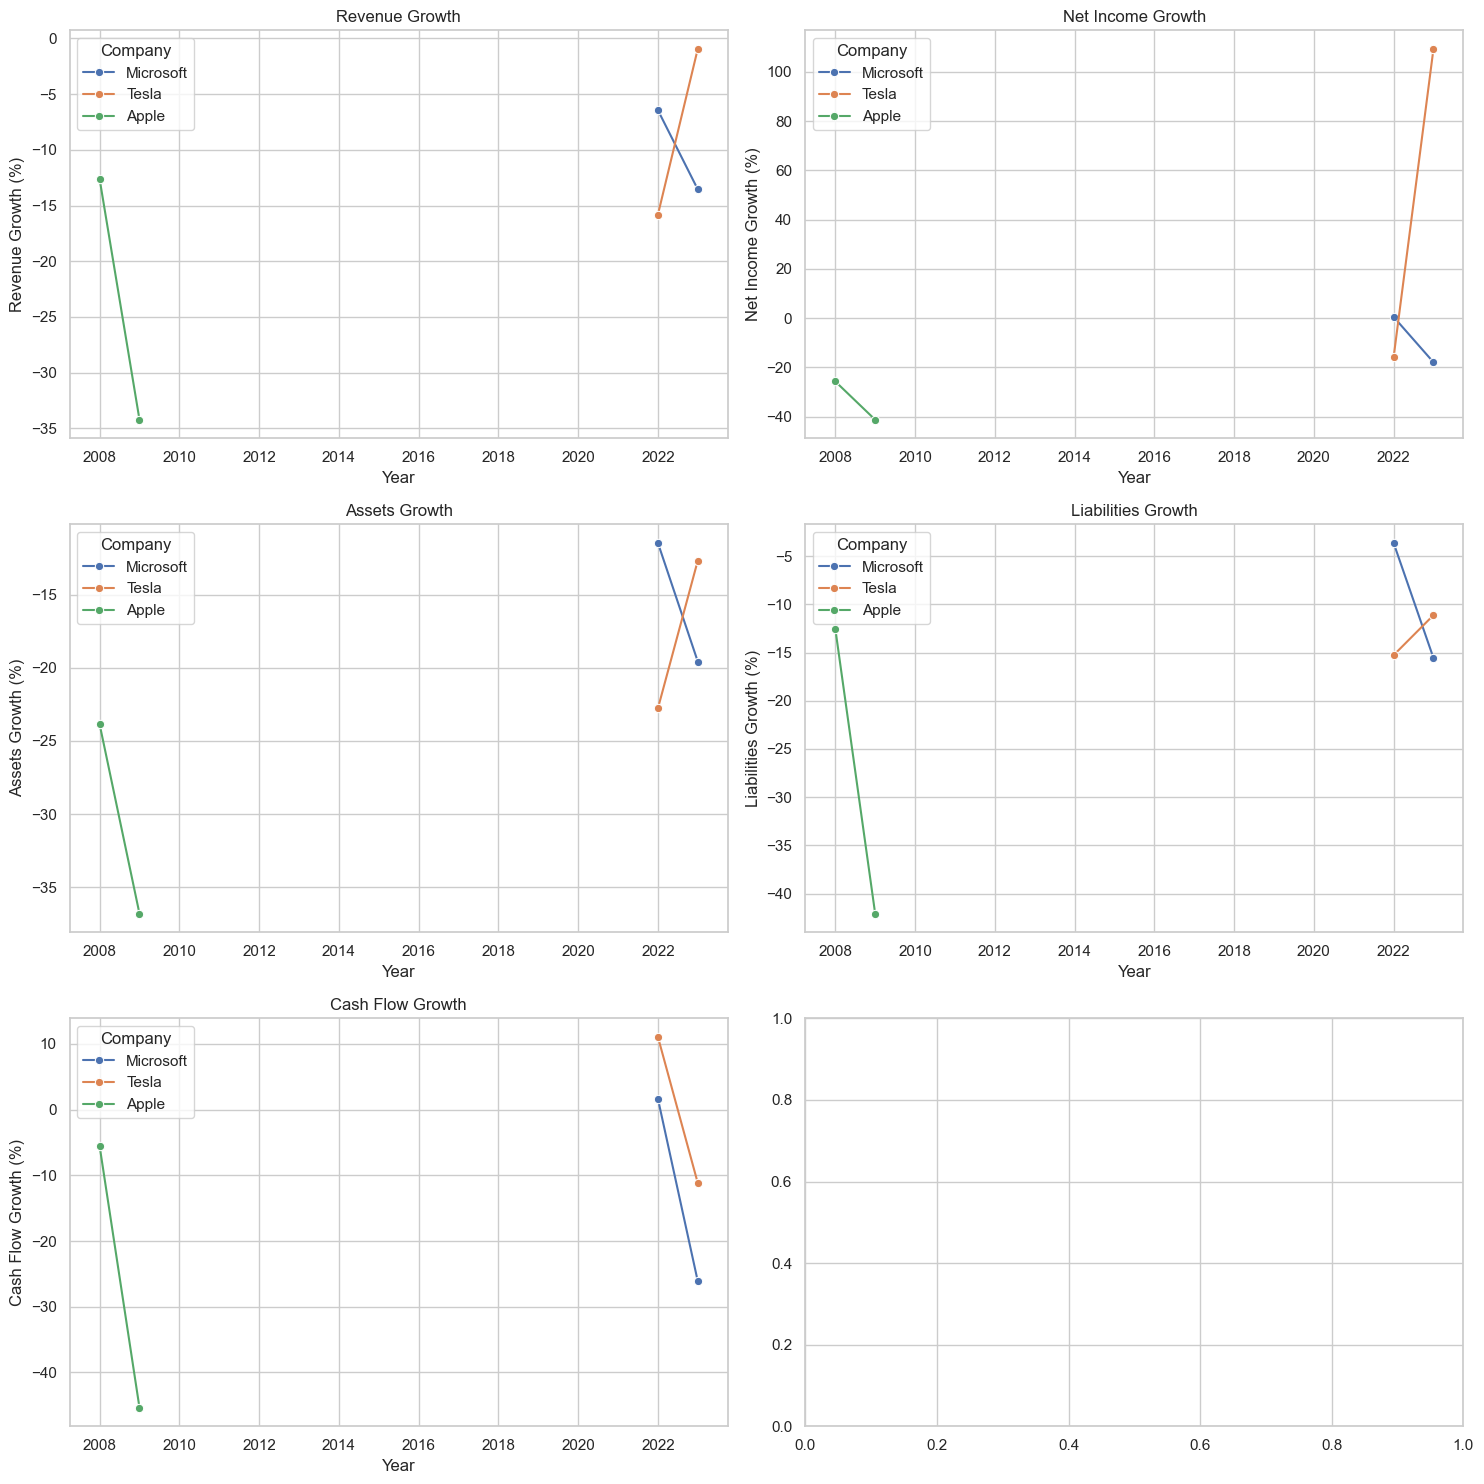

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
metrics = ['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']
titles = ['Revenue Growth', 'Net Income Growth', 'Assets Growth', 'Liabilities Growth', 'Cash Flow Growth']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.lineplot(data=df, x='Year', y=metric, hue='Company', ax=ax, marker='o')
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{titles[i]} (%)')
    ax.legend(title='Company')

plt.tight_layout()
plt.show()

std_dev = df.groupby('Company').std()
print("\nStandard Deviation for Each Company:")
print(std_dev[['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']])

In [35]:
df.to_csv('C:\\Users\\kanup\\Downloads\\financial_data_analysis.csv', index=False)

From the analysis of Microsoft, Tesla, and Apple over the past three fiscal years:

- **Revenue Growth**: Microsoft showed the most consistent revenue with low variability. Tesla had high fluctuations, reflecting its aggressive growth phase. Apple showed negative average revenue growth.

- **Net Income Growth**: Tesla stands out with exceptionally high volatility in net income (~88% std dev), driven by rapid scaling and operational swings. Microsoft’s net income was relatively stable, and Apple’s net income declined on average.

- **Assets and Liabilities Growth**: All companies experienced moderate asset and liability changes, with Apple showing larger drops in liabilities and assets compared to the others.

- **Cash Flow from Operating Activities**: Tesla’s cash flow was the most volatile, while Microsoft maintained steady cash flow changes.

**Overall Insight**:
- Microsoft = Stable performer
- Tesla = High-risk, high-reward growth
- Apple = Experiencing contraction in key areas

These insights can inform an AI-powered financial chatbot to provide risk profiling and company comparison features.

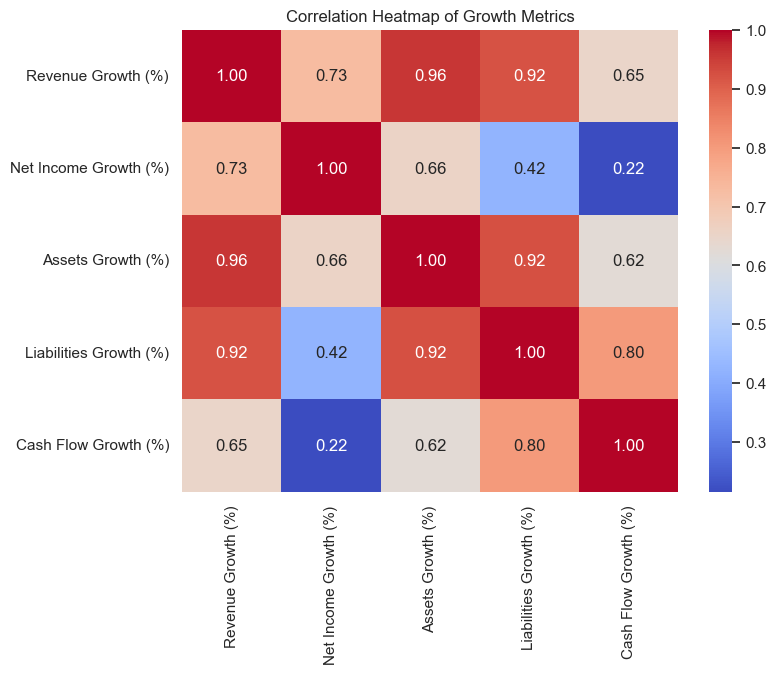

In [36]:
# Correlation heatmap
corr = df[['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)',
           'Liabilities Growth (%)', 'Cash Flow Growth (%)']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Growth Metrics')
plt.show()